<a href="https://colab.research.google.com/github/R-Sandor/crash-clock/blob/main/Abstract_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract




## Members


Raphael J. Sandor
Email: rsand006@odu.edu;
Web portfolio: https://r-sandor.github.io/

Kayla Preston
Email: kpres007@odu.edu;
Web portfolio:https://kpreston1024.github.io/

John Cartwright
Email: jcart081@odu.edu
Web portfolio: https://github.com/jbudcardi

## Goal Statement

The goal of this project is to visulize and model the impact of daylight savings on vehicular collisions and provide an answer to which UTC offset scheme decreases crashes. Recently in the United States there has been discussion at a national level for adopting permanent daylight savings time (DST). Proponents of the legislation claim it would decrease the number of vehicular collisions and Project Crash Clock aims to verify this assertion. Analysis between two United States cities of the same size relative will be used. One of the cities in the study stays in standard time all year around, Tempe, Arizona and the other Carry, North Carolina participates in DST. Their crash data will be used to compare and contrast correlate collisions to daylight and time of day.

## Raw Data Sources

In [2]:
# Load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from IPython.display import display, HTML
from dateutil.parser import parse as tp
import ipywidgets as widgets
from IPython.display import display, Image
import numpy as np
import folium
from folium.plugins import HeatMap

In [4]:
tempe_df=pd.read_csv('/content/drive/MyDrive/cs620-data/1.08_Crash_Data_Report_(detail)-2.csv')

In [5]:
carry_df=pd.read_json('/content/drive/MyDrive/cs620-data/cpd-crash-incidents.json')



---



### Primary Data Source
- [Tempe, AZ](https://catalog.data.gov/dataset/1-08-crash-data-report-detail-498c3):
This dataset presents the road collisions in Tempe Arrizona. This is the primary dataset that will be used to analyze daylight savings impact as the state does not observe nor adjust the UTC offset for daylight saving. The data is recorded in Arizona local time (UTC-7) which is seven hours behind UTC. The data consists of 51,304 records, with record collection starting 2012 to 2024.


### Secondary Data Source
- [Carry, NC](https://catalog.data.gov/dataset/crash-data):
The town of Carry is located in North Carolina and participates in daylight savings time and was selected do to its approximate size to Tempe and participation Daylight Savings Time.
The raw dataset includes collisions from 2020 to 2025, consisting of over 20,500 records.

#### Data Sample - Tempe, AZ

In [6]:
display(HTML(tempe_df.head(2).to_html()))

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369.0,2012/01/01 07:25:00+00,2012.0,University Dr,Hardy Dr,0.00,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420.0,2012/01/01 11:45:00+00,2012.0,7th St,Myrtle Ave,139.92,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769


#### Data Sample - Carry, NC

In [7]:
display(HTML(carry_df.head(2).to_html()))

,tamainid,location_description,rdfeature,rdcharacter,rdclass,rdconfigur,rdsurface,rdcondition,lightcond,weather,trafcontrl,lat,lon,lon2,lat2,tract,zone,fatality,possblinj,numpassengers,numpedestrians,contrcir1_desc,contrcir2_desc,contrcir3_desc,contrcir4_desc,vehicle1,vehicle2,vehicle3,vehicle4,vehicle5,workarea,records,ta_date,ta_time,crash_date,geo_location,year,fatalities,injuries,month,contributing_factor,vehicle_type
0,44273,0 FEET FROM SR 1313 (WALNUT ST),FOUR-WAY INTERSECTION,"[STRAIGHT, LEVEL]",[STATE SECONDARY ROUTE],"[TWO-WAY, NOT DIVIDED]",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,STOP AND GO SIGNAL,NaN,NaN,-78.7673,35.7754,None,None,0,0,2.0,NaN,NONE,None,NONE,None,PASSENGER CAR,PASSENGER CAR,None,None,None,NO,1003,2020-03-19,2025-02-16 08:38:12,2020-03-19T12:38:12+00:00,None,2020,No,No,3,"[NONE, NONE]","[PASSENGER CAR, PASSENGER CAR]"
1,44282,0 FEET FROM S.R. 1349 (DILLARD DR),FOUR-WAY INTERSECTION,"[STRAIGHT, LEVEL]",[STATE SECONDARY ROUTE],"[TWO-WAY, DIVIDED, UNPROTECTED MEDIAN]",SMOOTH ASPHALT,WET,DARK - LIGHTED ROADWAY,RAIN,STOP AND GO SIGNAL,NaN,NaN,-78.7411,35.7533,None,None,0,1,NaN,NaN,NONE,None,NONE,None,PASSENGER CAR,PASSENGER CAR,None,None,None,NO,1012,2020-03-21,2025-02-16 21:17:58,2020-03-22T01:17:58+00:00,None,2020,No,Yes,3,"[NONE, NONE]","[PASSENGER CAR, PASSENGER CAR]"


## Work Plan

Screenshots from Gannt Chart.

_Use scrollbar to navigate the Gantt screenshots._

### PDF Version:
- [Project Crash Clock Gannt](https://drive.google.com/file/d/1cwFbP70SRn7yLs3o7W2Y0IY8IPTWfTA9/view?usp=drive_link)

In [9]:
# Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
img1 = open('/content/drive/MyDrive/cs620-data/planned-0.png', 'rb').read()
img2 = open('/content/drive/MyDrive/cs620-data/planned-1.png', 'rb').read()
img3 = open('/content/drive/MyDrive/cs620-data/planned-2.png', 'rb').read()
img4 = open('/content/drive/MyDrive/cs620-data/planned-3.png', 'rb').read()

# ## Create image widgets. You can use layout of ipywidgets only with widgets.
## Set image variable, image format and dimension.
wi1 = widgets.Image(value=img1, format='png', width=1500, height=1200)
wi2 = widgets.Image(value=img2, format='png', width=1500, height=1200)
wi3 = widgets.Image(value=img3, format='png', width=1500, height=1200)
wi4 = widgets.Image(value=img4, format='png', width=1500, height=1200)

# ## Side by side thanks to HBox widgets
sidebyside = widgets.HBox([wi1, wi2, wi3, wi4])
## Finally, show.
display(sidebyside)

# Project Crash Clock

## Data preperation and cleaning

Get rid of the invalid rows.

In [10]:
dateTime = tempe_df['DateTime']
def parseTime(t):
    ret = -1
    try:
        ret = tp(t)
    except TypeError:
        # Print the type error just to log.
        print('Type Error')
    except dateutil.parser.ParserError:
        # Handle the parse error by logging too.
        print('Parse Error.')
    except:
        # Not one of the errors above.
        print("An Error occured")
    return ret

# Get the hour data from the datetTime.
dateTime = dateTime.apply(parseTime)
drpIdx = dateTime[dateTime == -1].index
print('Number of dropped Indexes {0}'.format(len(drpIdx)))
dateTime.drop(index=drpIdx)
tempe_df = tempe_df.drop(index=drpIdx)
tempe_df['DateTime'] = dateTime

Type Error
Number of dropped Indexes 1


In [11]:
tempe_df['hour'] = tempe_df['DateTime'].map(lambda t: t.hour)
tempe_df['minute'] = tempe_df['DateTime'].map(lambda t: t.minute)

In [12]:
display(HTML(carry_df.head(2).to_html()))

,tamainid,location_description,rdfeature,rdcharacter,rdclass,rdconfigur,rdsurface,rdcondition,lightcond,weather,trafcontrl,lat,lon,lon2,lat2,tract,zone,fatality,possblinj,numpassengers,numpedestrians,contrcir1_desc,contrcir2_desc,contrcir3_desc,contrcir4_desc,vehicle1,vehicle2,vehicle3,vehicle4,vehicle5,workarea,records,ta_date,ta_time,crash_date,geo_location,year,fatalities,injuries,month,contributing_factor,vehicle_type
0,44273,0 FEET FROM SR 1313 (WALNUT ST),FOUR-WAY INTERSECTION,"[STRAIGHT, LEVEL]",[STATE SECONDARY ROUTE],"[TWO-WAY, NOT DIVIDED]",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,STOP AND GO SIGNAL,NaN,NaN,-78.7673,35.7754,None,None,0,0,2.0,NaN,NONE,None,NONE,None,PASSENGER CAR,PASSENGER CAR,None,None,None,NO,1003,2020-03-19,2025-02-16 08:38:12,2020-03-19T12:38:12+00:00,None,2020,No,No,3,"[NONE, NONE]","[PASSENGER CAR, PASSENGER CAR]"
1,44282,0 FEET FROM S.R. 1349 (DILLARD DR),FOUR-WAY INTERSECTION,"[STRAIGHT, LEVEL]",[STATE SECONDARY ROUTE],"[TWO-WAY, DIVIDED, UNPROTECTED MEDIAN]",SMOOTH ASPHALT,WET,DARK - LIGHTED ROADWAY,RAIN,STOP AND GO SIGNAL,NaN,NaN,-78.7411,35.7533,None,None,0,1,NaN,NaN,NONE,None,NONE,None,PASSENGER CAR,PASSENGER CAR,None,None,None,NO,1012,2020-03-21,2025-02-16 21:17:58,2020-03-22T01:17:58+00:00,None,2020,No,Yes,3,"[NONE, NONE]","[PASSENGER CAR, PASSENGER CAR]"


Normalize the time data for carry.

In [13]:
dateTime = carry_df['crash_date']
dateTime = dateTime.apply(parseTime)

drpIdx = dateTime[dateTime == -1].index
print('Number of dropped Indexes {0}'.format(len(drpIdx)))
dateTime.drop(index=drpIdx)
carry_df = carry_df.drop(index=drpIdx)
carry_df['DateTime'] = dateTime

Number of dropped Indexes 0


In [14]:
carry_df['hour'] = carry_df['DateTime'].map(lambda t: t.hour)
carry_df['minute'] = carry_df['DateTime'].map(lambda t: t.minute)

In [15]:
carry_df.loc[0, :]

,0
tamainid,44273
location_description,0 FEET FROM SR 1313 (WALNUT ST)
rdfeature,FOUR-WAY INTERSECTION
rdcharacter,"[STRAIGHT, LEVEL]"
rdclass,[STATE SECONDARY ROUTE]
rdconfigur,"[TWO-WAY, NOT DIVIDED]"
rdsurface,SMOOTH ASPHALT
rdcondition,DRY
lightcond,DAYLIGHT
weather,CLEAR


Maintain the more precise location from lat/lon if its available if not use the generalized lat2/lon2 column values.

In [16]:
# Function to map values
def map_values(row, column):
    if pd.notnull(row[column]):
        return row[column]
    else:
        return row[column+'2']

# Apply function to column 'B' and replace its values
carry_df['lat'] = carry_df.apply(lambda row: map_values(row, 'lat'), axis=1)
carry_df['lon'] = carry_df.apply(lambda row: map_values(row, 'lon'), axis=1)

Drop redundant data.

In [17]:
carry_df = carry_df.drop(['lat2','lon2', 'geo_location'], axis=1)

Tidy data for tempe:
- delete X, Y
- latitude - lat
- longitude - long

In [18]:
full = tempe_df.shape
tempe_df = tempe_df.dropna(subset=['Latitude','Longitude'])
dropped = tempe_df.shape
totalDropped = np.subtract(full, dropped)[0]

print("Dropped rows of data without lat/lon: " + str(totalDropped))

Dropped rows of data without lat/lon: 142


In [19]:
tempe_df = tempe_df.drop(['X', 'Y'], axis=1)
tempe_df.rename(columns={'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

In [20]:
full = carry_df.shape
carry_df = carry_df.dropna(subset=['lat','lon'])
dropped = carry_df.shape
totalDropped = np.subtract(full, dropped)[0]

print("Dropped rows of data without lat/lon: " + str(totalDropped))

Dropped rows of data without lat/lon: 397


In [21]:
tempe_df

,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,...,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,lat,lon,hour,minute
0,1,2598369.0,2012-01-01 07:25:00+00:00,2012.0,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,...,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.421910,-111.952210,7,25
1,2,2593420.0,2012-01-01 11:45:00+00:00,2012.0,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,33.423190,-111.937690,11,45
2,3,2588493.0,2012-01-01 18:07:00+00:00,2012.0,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,...,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,18,7
3,4,2584449.0,2012-01-02 00:03:00+00:00,2012.0,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,...,NaN,East,Properly Parked,NaN,NaN,NaN,33.417790,-111.947910,0,3
4,5,2592211.0,2012-01-02 00:12:00+00:00,2012.0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,...,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51300,51301,4155893.0,2024-03-09 07:44:00+00:00,2024.0,US-60 Exit 173 J-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,33.386046,-111.939524,7,44
51301,51302,4154752.0,2024-03-11 20:30:00+00:00,2024.0,I-10 Exit 153 C1-Ramp,NaN,0.000,Not Junction Related,0.0,0.0,...,Female,East,Making Right Turn,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.409359,-111.972540,20,30
51302,51303,4155884.0,2024-03-14 13:15:00+00:00,2024.0,SR-202 Exit 7 T-Ramp,NaN,0.000,Not Junction Related,1.0,0.0,...,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.435558,-111.926385,13,15
51303,51304,4155885.0,2024-03-14 13:20:00+00:00,2024.0,SR-202 Exit 7 T-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,...,Female,West,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.435576,-111.926404,13,20


In [134]:
#pip install folium pandas
# Center of the hotest hotspot
hotest_tempe_lat = 33.42188466198674
hotest_tempe_lon = -111.9259716401924
# Best center to capture the data

tempe_lat = 33.38566993895023
tempe_lon = -111.92640785636813

carry_lat = 35.79112747380262
carry_lon = -78.78151011866262

In [159]:
f = folium.Figure(width=900, height=600, title="Tempe and Carry Collision Heatmap")

mt = folium.Map(location=[tempe_lat, tempe_lon], zoom_start=12)
mc = folium.Map(location=[carry_lat, carry_lon], zoom_start=12)

subplot1 = f.add_subplot(1, 2, 1)
subplot2 = f.add_subplot(1, 2, 2)

In [160]:
heat_data_tempe = [[row['lat'], row['lon']] for index, row in tempe_df.iterrows()]
heat_data_carry = [[row['lat'], row['lon']] for index, row in carry_df.iterrows()]

In [161]:
subplot1.add_child(mt)
subplot2.add_child(mc)
HeatMap(heat_data_tempe, min_opacity=.25).add_to(mt)
HeatMap(heat_data_carry, min_opacity=.25).add_to(mc)

In [169]:
f

<Axes: >

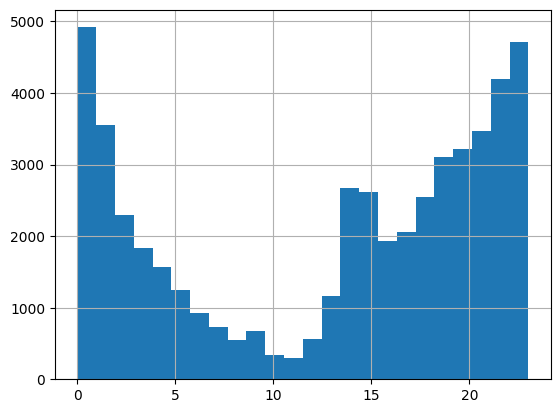

In [27]:
tempe_df['hour'].hist(bins=24)

<Axes: >

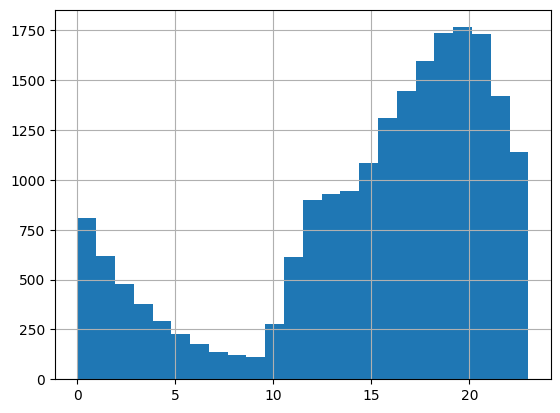

In [28]:
carry_df['hour'].hist(bins=24)